In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','availability'],axis='columns')
df2.shape

(13320, 6)

In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df3.shape


(12710, 6)

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\mayan\AppData\Local\Temp\ipykernel_8076\1100308896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head()


,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [17]:
def ind_to_usd(x):
    return x*100000/82

In [18]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.price=df4.price.apply(ind_to_usd)
df4 = df4[df4.total_sqft.notnull()]
df4.head(10)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,47646.341463,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,146341.463415,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,75609.756098,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,115853.658537,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,62195.121951,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,46341.463415,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,77134.146341,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,85365.853659,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,359756.097561,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,46341.463415,2


In [19]:
df4.loc[33]


location      Raja Rajeshwari Nagar
size                          3 BHK
total_sqft                   1693.0
bath                            3.0
balcony                         3.0
price                  69987.804878
bhk                               3
Name: 33, dtype: object

In [20]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,47646.341463,2,4.511964e+06
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,146341.463415,4,5.628518e+06
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,75609.756098,3,5.250678e+06
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,115853.658537,3,7.616940e+06
4,Kothanur,2 BHK,1200.0,2.0,1.0,62195.121951,2,5.182927e+06


In [21]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.266800e+04
mean     8.385704e+06
std      2.760188e+07
min      3.266217e+05
25%      5.174050e+06
50%      6.556517e+06
75%      8.710801e+06
max      2.804878e+09
Name: price_per_sqft, dtype: float64

In [22]:
df5.to_csv("bhp.csv",index=False)

In [23]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: location, Length: 1248, dtype: int64

In [24]:
len(location_stats[location_stats>10])

235

In [25]:
len(location_stats[location_stats<=10])

1013

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: location, Length: 1013, dtype: int64

In [27]:
len(df5.location.unique())

1248

In [28]:
df5.location = df5.location.apply(lambda x: 'otherPlaces' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

236

In [29]:
df5.head(100)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,47646.341463,2,4.511964e+06
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,146341.463415,4,5.628518e+06
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,75609.756098,3,5.250678e+06
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,115853.658537,3,7.616940e+06
4,Kothanur,2 BHK,1200.0,2.0,1.0,62195.121951,2,5.182927e+06
...,...,...,...,...,...,...,...,...
103,otherPlaces,2 BHK,1007.0,2.0,2.0,52439.024390,2,5.207450e+06
104,otherPlaces,2 BHK,1200.0,2.0,2.0,60975.609756,2,5.081301e+06
105,otherPlaces,2 BHK,966.0,2.0,2.0,60853.658537,2,6.299551e+06
106,Nagarbhavi,3 BHK,1630.0,2.0,1.0,119512.195122,3,7.332037e+06


In [30]:
df5[df5.total_sqft/df5.bhk<150].head(10)


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,195121.951220,6,2.748196e+07
119,Hennur Road,2 Bedroom,276.0,3.0,3.0,28048.780488,2,1.016260e+07
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,0.0,140243.902439,7,1.476252e+07
176,Kumaraswami Layout,5 Bedroom,600.0,3.0,2.0,103658.536585,5,1.727642e+07
349,otherPlaces,3 Bedroom,11.0,3.0,2.0,90243.902439,3,8.203991e+08
482,Kenchenahalli,5 Bedroom,500.0,3.0,2.0,79268.292683,5,1.585366e+07
770,otherPlaces,9 Bedroom,600.0,9.0,3.0,231707.317073,9,3.861789e+07
789,otherPlaces,6 Bedroom,600.0,4.0,3.0,79268.292683,6,1.321138e+07
857,Vijayanagar,8 Bedroom,600.0,4.0,1.0,87804.878049,8,1.463415e+07
992,Rajaji Nagar,4 Bedroom,315.0,4.0,2.0,109756.097561,4,3.484321e+07


In [31]:
df6 = df5[~(df5.total_sqft/df5.bhk<150)]
df6.shape

(12556, 8)

In [32]:
df6.price_per_sqft.describe()


count    1.255600e+04
mean     7.895855e+06
std      5.167779e+06
min      3.266217e+05
25%      5.159475e+06
50%      6.514488e+06
75%      8.638211e+06
max      2.152080e+08
Name: price_per_sqft, dtype: float64

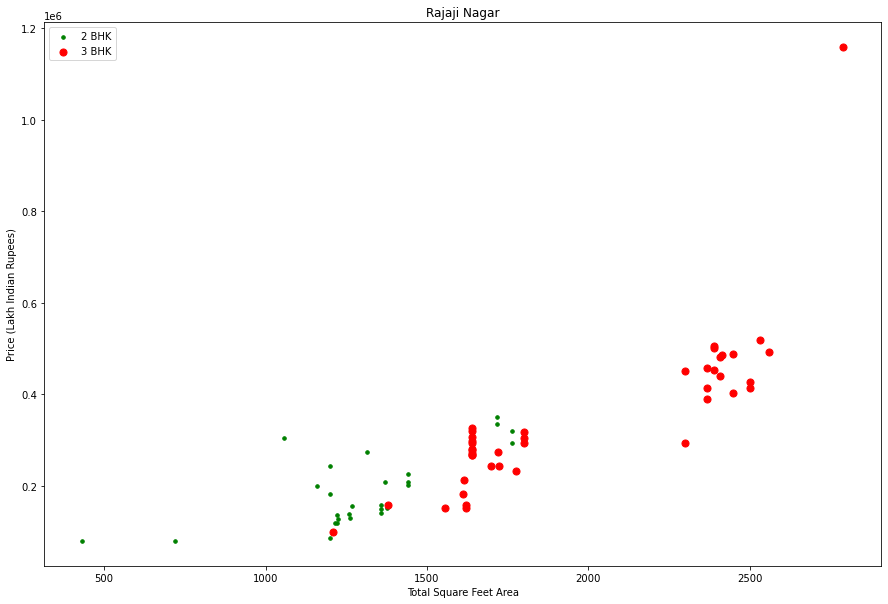

In [33]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='.',color='green',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='o', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

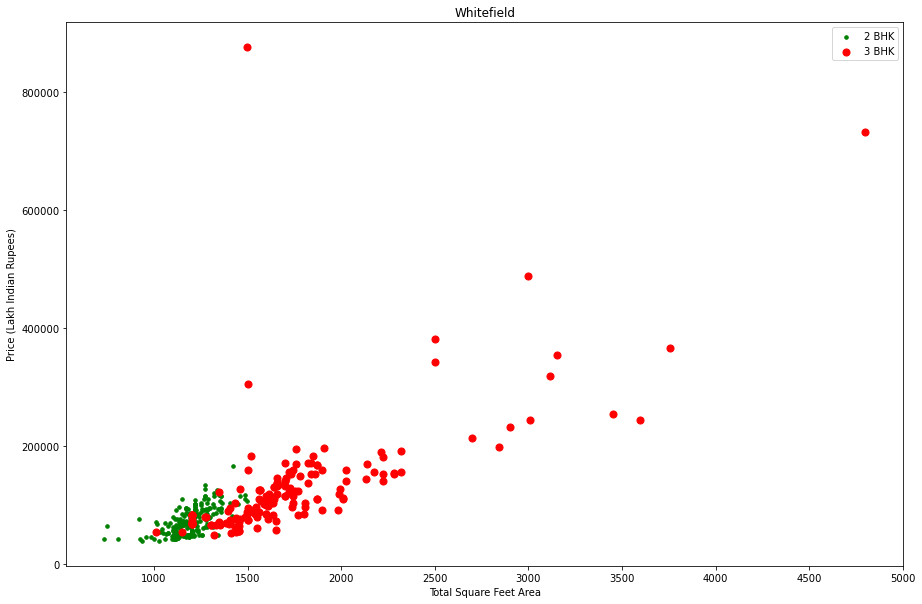

In [34]:
plot_scatter_chart(df6,"Whitefield")


In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [36]:
df7 = remove_bhk_outliers(df6)

In [37]:
df7.shape

(8749, 8)

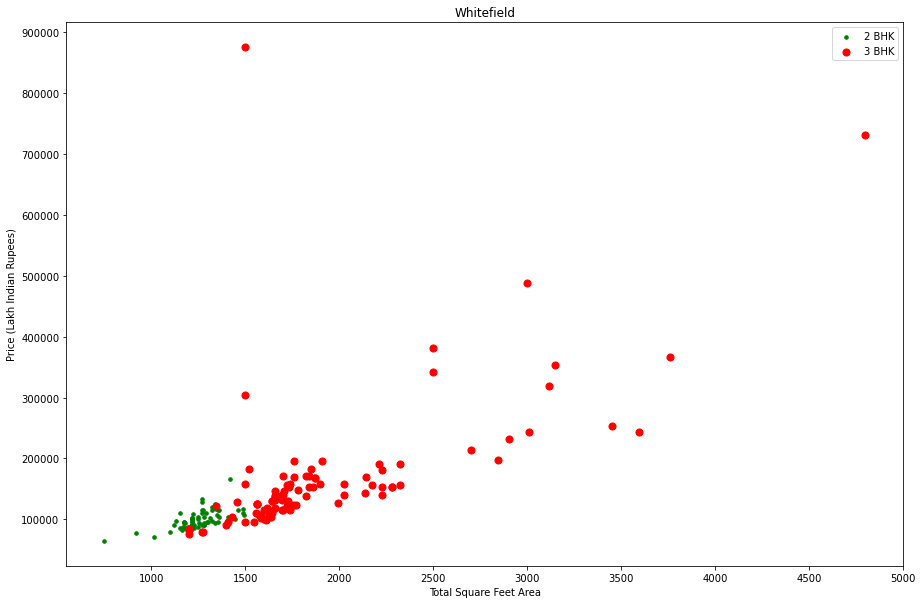

In [38]:
plot_scatter_chart(df7,"Whitefield")


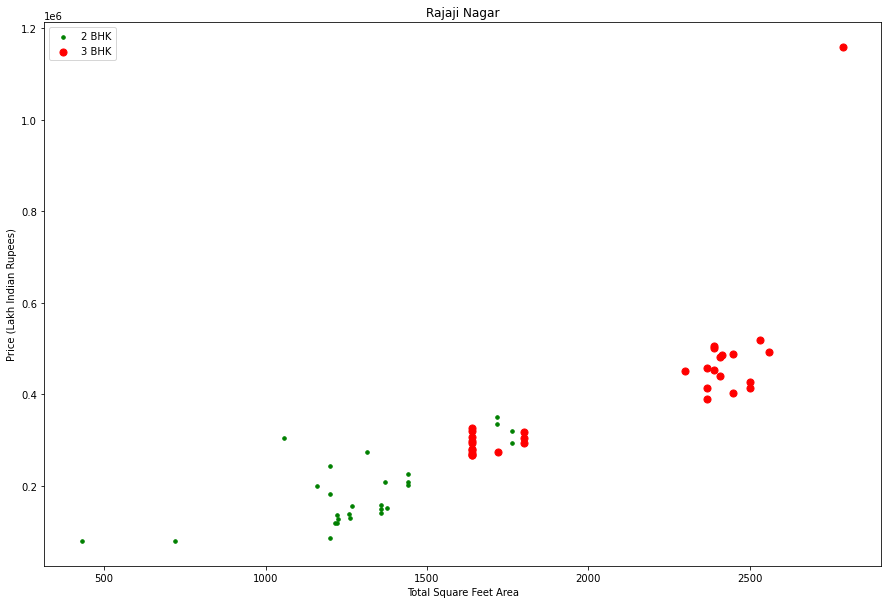

In [39]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

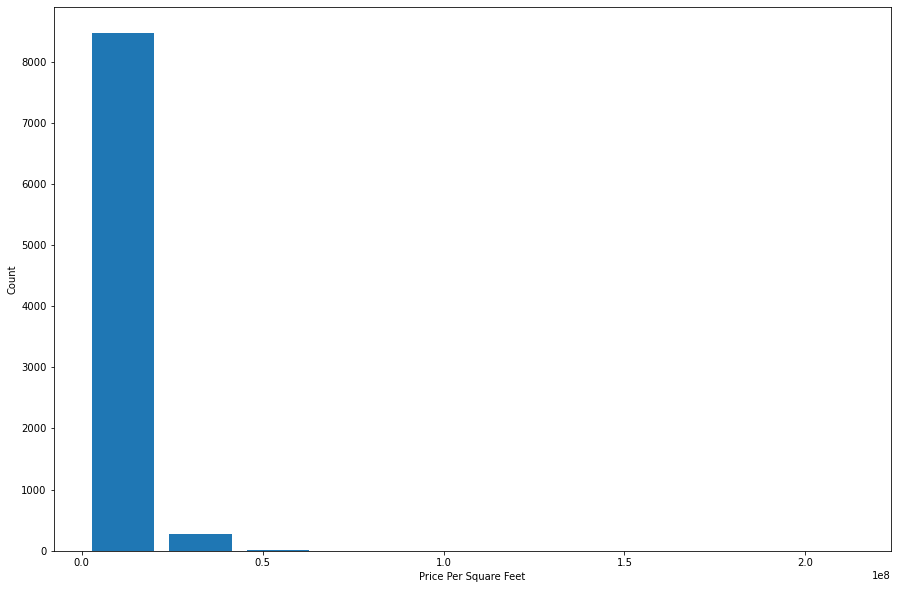

In [40]:
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df7.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 10., 13.])

Text(0, 0.5, 'Count')

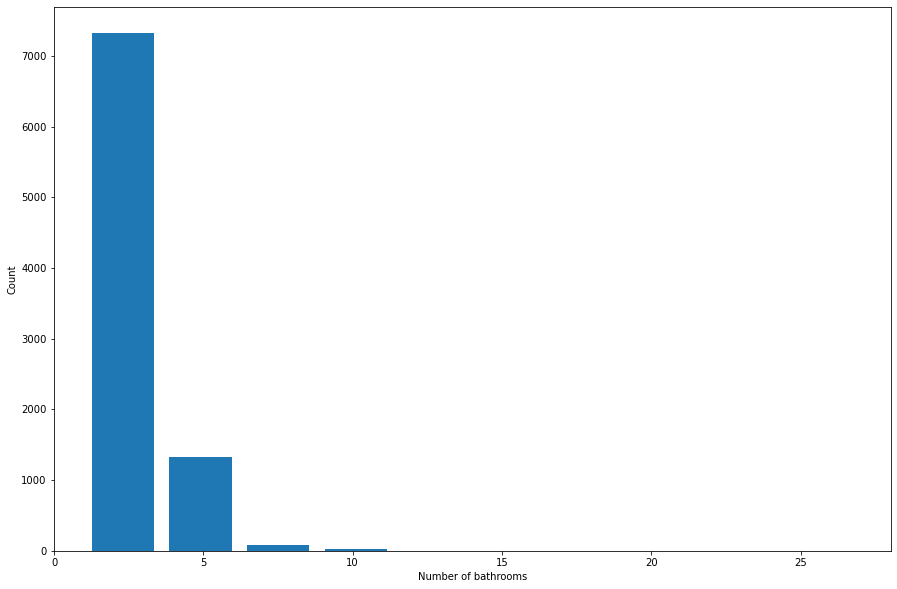

In [42]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [43]:
df7[df7.bath>10]


,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1718,otherPlaces,27 BHK,8000.0,27.0,0.0,280487.804878,27,3.506098e+06
9935,otherPlaces,13 BHK,5425.0,13.0,0.0,335365.853659,13,6.181859e+06


In [44]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
6838,Rajaji Nagar,5 BHK,7500.0,8.0,3.0,2.073171e+06,5,2.764228e+07
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,9.756098e+04,4,3.965893e+06
9974,otherPlaces,3 Bedroom,2400.0,6.0,2.0,9.451220e+05,3,3.938008e+07
11645,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,2.804878e+05,6,1.869919e+07
12103,Thanisandra,3 BHK,1806.0,6.0,2.0,1.414634e+05,3,7.832969e+06


In [45]:
df7[df7.balcony>df7.bhk+1]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
7088,otherPlaces,1 BHK,650.0,1.0,3.0,609756.097561,1,9.380863e+07
13305,Hulimavu,1 BHK,500.0,1.0,3.0,268292.682927,1,5.365854e+07


In [46]:
df8=df7[df7.bath<df7.bhk+2]

In [47]:
df8.shape

(8630, 8)

In [48]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(6)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,47646.341463,2
1,Chikka Tirupathi,2600.0,5.0,3.0,146341.463415,4
2,Uttarahalli,1440.0,2.0,3.0,75609.756098,3
3,Lingadheeranahalli,1521.0,3.0,1.0,115853.658537,3
4,Kothanur,1200.0,2.0,1.0,62195.121951,2
11,Whitefield,2785.0,5.0,3.0,359756.097561,4


In [49]:
texttonum= pd.get_dummies(df9.location)
texttonum.head(100)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,otherPlaces
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df10 = pd.concat([df9,texttonum.drop('otherPlaces',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,47646.341463,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,3.0,146341.463415,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,75609.756098,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,115853.658537,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,62195.121951,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df11 = df10.drop('location',axis='columns')
df11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,47646.341463,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,146341.463415,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,75609.756098,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,115853.658537,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,62195.121951,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = df11.drop(['price'],axis='columns')
X.head(3)


,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
y = df11.price
y.head(3)

0     47646.341463
1    146341.463415
2     75609.756098
Name: price, dtype: float64

In [71]:
len(y)
x.shape


(8630, 239)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)*100

60.42143161226385

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.57716953, 0.64889603, 0.38101576, 0.54910217, 0.65322182])

In [85]:
def pp(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return f"$ {int(lr_clf.predict([x])[0])}"

In [86]:
pp('1st Phase JP Nagar',1000, 2, 2)

C:\Users\mayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'$ 83104'

In [87]:
pp('1st Phase JP Nagar',1000, 2, 2)

C:\Users\mayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'$ 83104'

In [92]:
x.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=239)